In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import FeatureAgglomeration
import matplotlib.pyplot as plt

In [2]:
data_np = pd.read_csv('datasets/sff.csv', index_col=False).to_numpy()[:,1:]

In [3]:
data_np

array([[ 1.64742157e-02,  1.67021319e-02,  1.70008616e-02, ...,
         1.60803625e+00,  1.48152850e+00,  1.92000023e+00],
       [ 1.40290940e-02,  1.41673827e-02,  1.42059936e-02, ...,
         2.69828242e-01,  1.19795895e+00,  2.93990392e+00],
       [ 1.58642467e-02,  1.59525235e-02,  1.58723699e-02, ...,
         1.87115708e+00,  3.93370401e+00, -7.02670545e+01],
       ...,
       [ 1.44262352e-02,  1.45137135e-02,  1.45445926e-02, ...,
        -1.01630259e+01,  2.87106048e+01,  7.00539668e+00],
       [ 1.99505806e-02,  1.99579868e-02,  1.97161118e-02, ...,
        -3.87427912e-01, -1.38662758e+00, -3.73689524e+00],
       [ 1.56658762e-02,  1.57715695e-02,  1.60104728e-02, ...,
        -2.60718237e+00, -2.74665882e+00, -2.01420312e+00]])

In [4]:
scaler = StandardScaler()
data_np_scaled = scaler.fit_transform(data_np)

In [5]:
data_np_scaled

array([[ 5.17916198e-02,  9.30403644e-02,  1.34445910e-01, ...,
         3.39221793e-02,  5.24386075e-02,  8.90227159e-02],
       [-4.08661120e-01, -3.87547106e-01, -3.92156589e-01, ...,
         3.38783895e-02,  4.90982840e-02,  1.49385355e-01],
       [-6.30746044e-02, -4.90850992e-02, -7.81818598e-02, ...,
         3.39307893e-02,  8.13241473e-02, -4.18334259e+00],
       ...,
       [-3.33873532e-01, -3.21882920e-01, -3.28358556e-01, ...,
         3.35369989e-02,  3.73185048e-01,  3.90000106e-01],
       [ 7.06442774e-01,  7.10349198e-01,  6.46047008e-01, ...,
         3.38568824e-02,  1.86530012e-02, -2.45778642e-01],
       [-1.00430716e-01, -8.33939078e-02, -5.21608341e-02, ...,
         3.37842461e-02,  2.63243648e-03, -1.43821718e-01]])

In [6]:
# Reduce to desired number of components (e.g., 50)
pca = PCA(n_components=10)
data_pca = pca.fit_transform(data_np_scaled)

# Explained variance to understand how much information is retained
print(pca.explained_variance_ratio_)

[0.3976302  0.25806467 0.03493557 0.0109266  0.00936896 0.00712813
 0.00643094 0.00522216 0.00508494 0.00421356]


In [7]:
data_pca

array([[ -2.79779793, -15.29312662,   9.61284359, ...,  -1.86589724,
          0.65100308,   0.07249698],
       [-29.9076889 , -17.95256772,  23.39647568, ...,  -3.61574012,
          3.07857896,   0.93089617],
       [  5.94969536,  -5.43512096,   4.00435958, ...,  -3.98891076,
          1.9785822 ,  -0.83644434],
       ...,
       [ -5.85952453, -12.3219887 , -11.17126966, ...,  -1.88258127,
          0.92058542,  -0.08424432],
       [ 24.99167226,  10.96050715, -10.04396906, ...,  -4.03058737,
          0.73560943,   0.37384032],
       [-11.11346508, -18.22941556, -14.2567477 , ...,  -2.21078531,
          0.75542599,  -0.21277549]])

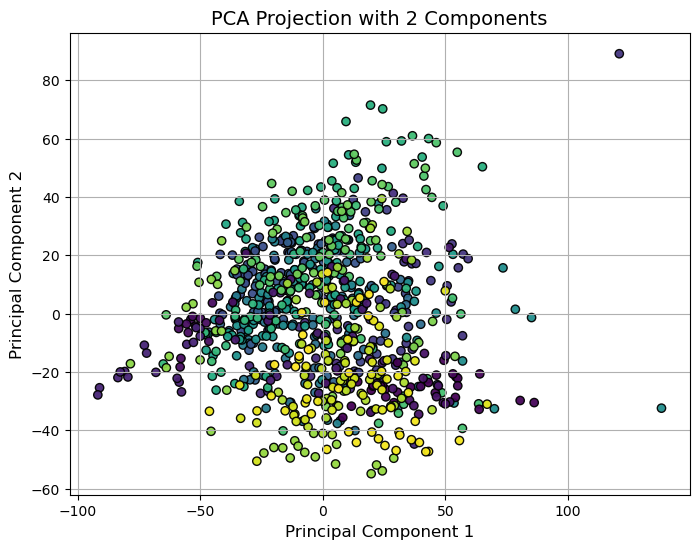

In [8]:
pca_plot = PCA(n_components=2)
data_pca_plot = pca.fit_transform(data_np_scaled)

# Plot the PCA output
plt.figure(figsize=(8, 6))
class_labels = np.array(pd.read_csv('datasets/sff_loc.csv', index_col=False).to_numpy()[:,0])
encoder = LabelEncoder()
class_labels_encoded = encoder.fit_transform(class_labels)
scatter = plt.scatter(data_pca_plot[:, 0], data_pca_plot[:, 1], c=class_labels_encoded, cmap='viridis', alpha=0.95, edgecolor='k')


# Add labels and title
plt.title('PCA Projection with 2 Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.savefig('pca_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
df = pd.DataFrame(data_pca)
df.to_csv('datasets/10features_pca.csv', index=False)

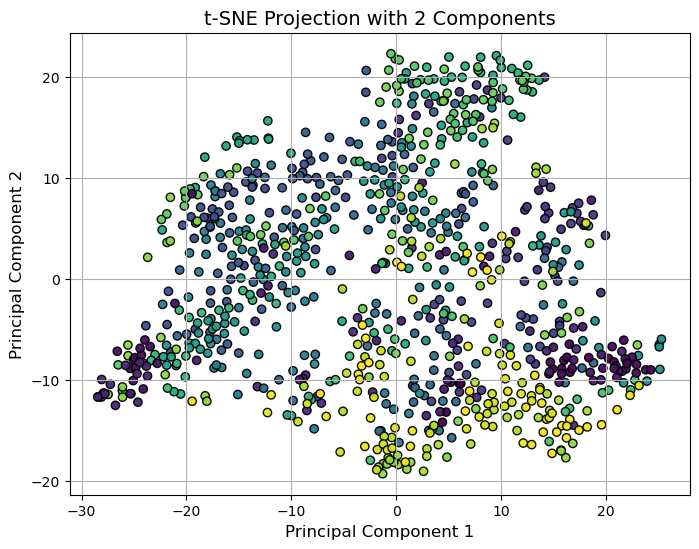

In [10]:
tsne = TSNE(n_components=2, random_state=42)
data_tsne_plot = tsne.fit_transform(data_np_scaled)

# Plot the PCA output
plt.figure(figsize=(8, 6))
class_labels = np.array(pd.read_csv('datasets/sff_loc.csv', index_col=False).to_numpy()[:,0])
encoder = LabelEncoder()
class_labels_encoded = encoder.fit_transform(class_labels)
scatter = plt.scatter(data_tsne_plot[:, 0], data_tsne_plot[:, 1], c=class_labels_encoded, cmap='viridis', alpha=0.95, edgecolor='k')


# Add labels and title
plt.title('t-SNE Projection with 2 Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.savefig('tsne_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
agglo = FeatureAgglomeration(n_clusters=10)
data_agglo = agglo.fit_transform(data_np_scaled)
df = pd.DataFrame(data_agglo)
df.to_csv('datasets/10features_data_agglo.csv', index=False)

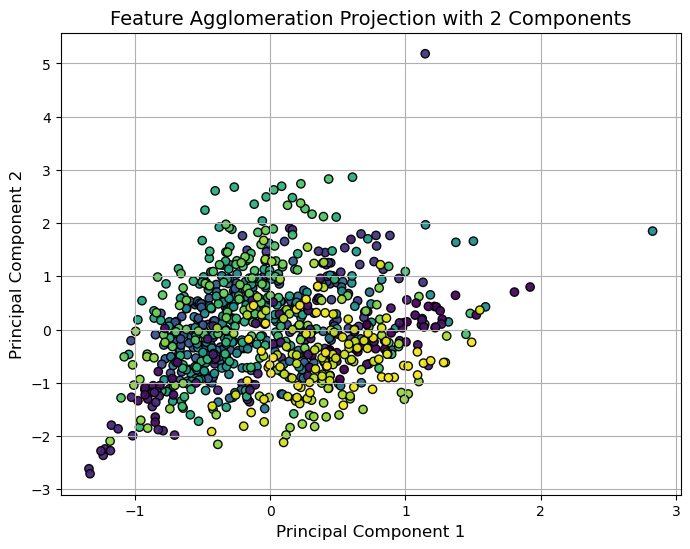

In [12]:
agglo = FeatureAgglomeration(n_clusters=2)
data_agglo_plot = agglo.fit_transform(data_np_scaled)

# Plot the PCA output
plt.figure(figsize=(8, 6))
class_labels = np.array(pd.read_csv('datasets/sff_loc.csv', index_col=False).to_numpy()[:,0])
encoder = LabelEncoder()
class_labels_encoded = encoder.fit_transform(class_labels)
scatter = plt.scatter(data_agglo_plot[:, 0], data_agglo_plot[:, 1], c=class_labels_encoded, cmap='viridis', alpha=0.95, edgecolor='k')


# Add labels and title
plt.title('Feature Agglomeration Projection with 2 Components', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(True)
plt.savefig('feature_agglomeration.png', dpi=300, bbox_inches='tight')
plt.show()